In [19]:
from sklearn.decomposition import PCA
import itertools
import csv
import numpy as np
from scipy import linalg
from scipy.stats import cumfreq
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
from sklearn import cluster
from rpy2 import robjects as ro
from rpy2.robjects.packages import importr
mvn = importr('MVN')
%matplotlib inline
np.random.seed(1)

In [7]:
X = np.load('SynapseFeatures.npy')
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

In [13]:
kmeans = cluster.MiniBatchKMeans(n_clusters=17)
ClusterIdx = kmeans.fit_predict(X)
print 'k-means complete'

k-means complete


In [48]:
import colorsys
nColors = len(np.unique(ClusterIdx))
HSV_tuples = [(x*1.0/nColors, 0.5, 0.5) for x in range(nColors)]
Colors = np.array(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
#Colors[ClusterIdx[0:10].tolist()].tolist()
Cluster2Colors = Colors[ClusterIdx.tolist()].tolist()

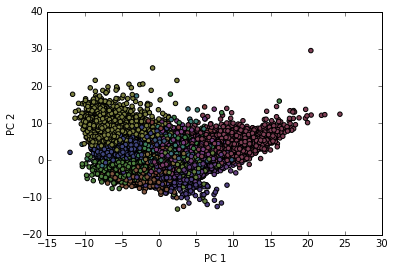

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_pca[:,0],X_pca[:,1],c=Cluster2Colors)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')